<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="300" alt="Skills Network Logo">
    </a>
</p>


# **Practice Project: Insurance Cost Analysis**

Estimated time needed: **75** minutes

In this project, you have to perform analytics operations on an insurance database that uses the below mentioned parameters.

| Parameter |Description| Content type |
|---|----|---|
|age| Age in years| integer |
|gender| Male or Female|integer (1 or 2)|
| bmi | Body mass index | float |
|no_of_children| Number of children | integer|
|smoker| Whether smoker or not | integer (0 or 1)|
|region| Which US region - NW, NE, SW, SE | integer (1,2,3 or 4 respectively)| 
|charges| Annual Insurance charges in USD | float|

## Objectives 
In this project, you will:
 - Load the data as a `pandas` dataframe
 - Clean the data, taking care of the blank entries
 - Run exploratory data analysis (EDA) and identify the attributes that most affect the `charges`
 - Develop single variable and multi variable Linear Regression models for predicting the `charges`
 - Use Ridge regression to refine the performance of Linear regression models. 
 


# Setup


For this lab, we will be using the following libraries:
* `skillsnetwork` to download the data
*   [`pandas`](https://pandas.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for managing the data.
*   [`numpy`](https://numpy.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for mathematical operations.
*   [`sklearn`](https://scikit-learn.org/stable/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for machine learning and machine-learning-pipeline related functions.
*   [`seaborn`](https://seaborn.pydata.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for visualizing the data.
*   [`matplotlib`](https://matplotlib.org/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMML0187ENSkillsNetwork31430127-2021-01-01) for additional plotting tools.


The following required libraries are __not__ pre-installed in the Skills Network Labs environment. __You will need to run the following cell__ to install them:


In [1]:
import piplite
await piplite.install('seaborn')
# await piplite.install(['pandas'])
# await piplite.install(['scikit-learn'])
# await piplite.install(['seaborn'])
# await piplite.install(['numpy'])

### Importing Required Libraries

_We recommend you import all required libraries in one place (here):_


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

<details>
    <summary>Click here for Solution</summary>

```python
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split
```

</details>


### Download the dataset to this lab environment

Run the cell below to load the dataset to this lab environment.


In [3]:
from pyodide.http import pyfetch

async def download(url, filename):
    response = await pyfetch(url)
    if response.status == 200:
        with open(filename, "wb") as f:
            f.write(await response.bytes())

In [6]:
filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'

In [7]:
await download(filepath, "insurance.csv")
file_name="insurance.csv"

In [8]:
df = pd.read_csv(file_name)

> Note: This version of the lab is working on JupyterLite, which requires the dataset to be downloaded to the interface.While working on the downloaded version of this notebook on their local machines(Jupyter Anaconda), the learners can simply **skip the steps above,** and simply use the URL directly in the `pandas.read_csv()` function. You can uncomment and run the statements in the cell below.


In [ ]:
#filepath = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DA0101EN-Coursera/medical_insurance_dataset.csv'
#df = pd.read_csv(filepath, header=None)

# Task 1 : Import the dataset

Import the dataset into a `pandas` dataframe. Note that there are currently no headers in the CSV file. 

Print the first 10 rows of the dataframe to confirm successful loading.


In [9]:
df.shape

(2771, 7)

In [10]:
df.head(10)

,19,1,27.9,0,1.1,3,16884.924
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160
5,46,1,33.440,1,0,4,8240.58960
6,37,1,27.740,3,0,1,7281.50560
7,37,2,29.830,2,0,2,6406.41070
8,60,1,25.840,0,0,1,28923.13692
9,25,2,26.220,0,0,2,2721.32080


<details>
    <summary>Click here for Solution</summary>

```python
df = pd.read_csv(path, header=None)
print(df.head(10))
```

</details>


Add the headers to the dataframe, as mentioned in the project scenario. 


In [11]:
headers = ['Age', 'Sex', 'BMI (Body Mass Index)', 'Children', 'Smoker', 'Region', 'Charges']
df.columns = headers
df.head()

,Age,Sex,BMI (Body Mass Index),Children,Smoker,Region,Charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160


<details>
    <summary>Click here for Solution</summary>

```python
headers = ["age", "gender", "bmi", "no_of_children", "smoker", "region", "charges"]
df.columns = headers
```

</details>


Now, replace the '?' entries with 'NaN' values.


In [12]:
df.dtypes   #seeing the results,we need to change the data types of column Age and Somker to int later

Age                       object
Sex                        int64
BMI (Body Mass Index)    float64
Children                   int64
Smoker                    object
Region                     int64
Charges                  float64
dtype: object

In [13]:
df = df.replace('?', np.nan )
df

,Age,Sex,BMI (Body Mass Index),Children,Smoker,Region,Charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,NaN,4,3756.62160
...,...,...,...,...,...,...,...
2766,47,1,45.320,1,0,4,8569.86180
2767,21,1,34.600,0,0,3,2020.17700
2768,19,2,26.030,1,1,1,16450.89470
2769,23,2,18.715,0,0,1,21595.38229


<details>
    <summary>Click here for Solution</summary>

```python
df.replace('?', np.nan, inplace = True)
```

</details>


In [14]:
df.describe(include = 'all')

,Age,Sex,BMI (Body Mass Index),Children,Smoker,Region,Charges
count,2767,2771.000000,2771.000000,2771.000000,2764,2771.000000,2771.000000
unique,47,NaN,NaN,NaN,2,NaN,NaN
top,18,NaN,NaN,NaN,0,NaN,NaN
freq,148,NaN,NaN,NaN,2201,NaN,NaN
mean,NaN,1.507398,30.702360,1.102129,NaN,2.559726,13260.062289
std,NaN,0.500036,6.130324,1.214845,NaN,1.130934,12153.767132
min,NaN,1.000000,15.960000,0.000000,NaN,1.000000,1121.873900
25%,NaN,1.000000,26.220000,0.000000,NaN,2.000000,4687.797000
50%,NaN,2.000000,30.495000,1.000000,NaN,3.000000,9304.701900
75%,NaN,2.000000,34.770000,2.000000,NaN,4.000000,16516.743675


In [15]:
df.describe(include = 'object')

,Age,Smoker
count,2767,2764
unique,47,2
top,18,0
freq,148,2201


# Task 2 : Data Wrangling


Use `dataframe.info()` to identify the columns that have some 'Null' (or NaN) information.


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    2767 non-null   object 
 1   Sex                    2771 non-null   int64  
 2   BMI (Body Mass Index)  2771 non-null   float64
 3   Children               2771 non-null   int64  
 4   Smoker                 2764 non-null   object 
 5   Region                 2771 non-null   int64  
 6   Charges                2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 130.0+ KB


<details>
    <summary>Click here for Solution</summary>

```python
print(df.info())
```

</details>


In [17]:
df1 = df.isnull()
df1.columns.values.tolist()

['Age',
 'Sex',
 'BMI (Body Mass Index)',
 'Children',
 'Smoker',
 'Region',
 'Charges']

In [18]:
for column in df1.columns.values.tolist():
    print(column)
    print (df1[column].value_counts())
    print("")    

Age
False    2767
True        4
Name: Age, dtype: int64

Sex
False    2771
Name: Sex, dtype: int64

BMI (Body Mass Index)
False    2771
Name: BMI (Body Mass Index), dtype: int64

Children
False    2771
Name: Children, dtype: int64

Smoker
False    2764
True        7
Name: Smoker, dtype: int64

Region
False    2771
Name: Region, dtype: int64

Charges
False    2771
Name: Charges, dtype: int64



Handle missing data:

- For continuous attributes (e.g., age), replace missing values with the mean.
- For categorical attributes (e.g., smoker), replace missing values with the most frequent value.
- Update the data types of the respective columns.
- Verify the update using `df.info()`.


In [19]:
df[['Age']] = df[['Age']].astype('float')
age_mean = df[['Age']].mean()
df[['Age']] = df[['Age']].replace(np.nan, age_mean)
#df[['Age']].value_counts()

In [20]:
df2 = df[['Age']].isnull()
df2[['Age']].value_counts()

Age  
False    2771
dtype: int64

In [21]:
age_mean

Age    39.117094
dtype: float64

In [22]:
df[['Smoker']] = df[['Smoker']].astype('float')

In [23]:
df['Smoker'].value_counts()

0.0    2201
1.0     563
Name: Smoker, dtype: int64

In [24]:
df_mode = df['Smoker'].value_counts().idxmax()  # Returns the index (or row label)  of the maximum value along the columns in a Series
df_mode

0.0

In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    2771 non-null   float64
 1   Sex                    2771 non-null   int64  
 2   BMI (Body Mass Index)  2771 non-null   float64
 3   Children               2771 non-null   int64  
 4   Smoker                 2764 non-null   float64
 5   Region                 2771 non-null   int64  
 6   Charges                2771 non-null   float64
dtypes: float64(4), int64(3)
memory usage: 151.6 KB


In [26]:
df[['Smoker']]

,Smoker
0,0.0
1,0.0
2,0.0
3,0.0
4,NaN
...,...
2766,0.0
2767,0.0
2768,1.0
2769,0.0


In [27]:

df[['Smoker']] = df[['Smoker']].replace(np.nan, df_mode )
df[['Smoker']].value_counts()

Smoker
0.0       2208
1.0        563
dtype: int64

In [28]:
df[['Smoker', 'Age']] = df[['Smoker', 'Age']].astype('int')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    2771 non-null   int32  
 1   Sex                    2771 non-null   int64  
 2   BMI (Body Mass Index)  2771 non-null   float64
 3   Children               2771 non-null   int64  
 4   Smoker                 2771 non-null   int32  
 5   Region                 2771 non-null   int64  
 6   Charges                2771 non-null   float64
dtypes: float64(2), int32(2), int64(3)
memory usage: 130.0 KB


<details>
    <summary>Click here for Solution</summary>

```python
# smoker is a categorical attribute, replace with most frequent entry
is_smoker = df['smoker'].value_counts().idxmax()
df["smoker"].replace(np.nan, is_smoker, inplace=True)

# age is a continuous variable, replace with mean age
mean_age = df['age'].astype('float').mean(axis=0)
df["age"].replace(np.nan, mean_age, inplace=True)

# Update data types
df[["age","smoker"]] = df[["age","smoker"]].astype("int")

print(df.info())
```

</details>


Also note, that the `charges` column has values which are more than 2 decimal places long. Update the `charges` column such that all values are rounded to nearest 2 decimal places. Verify conversion by printing the first 5 values of the updated dataframe.


In [30]:
df

,Age,Sex,BMI (Body Mass Index),Children,Smoker,Region,Charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,0,4,3756.62160
...,...,...,...,...,...,...,...
2766,47,1,45.320,1,0,4,8569.86180
2767,21,1,34.600,0,0,3,2020.17700
2768,19,2,26.030,1,1,1,16450.89470
2769,23,2,18.715,0,0,1,21595.38229


In [31]:
df[['Charges']] = df[['Charges']].round(2)
df

# OR 
# df[["charges"]] = np.round(df[["charges"]],2)

,Age,Sex,BMI (Body Mass Index),Children,Smoker,Region,Charges
0,18,2,33.770,1,0,4,1725.55
1,28,2,33.000,3,0,4,4449.46
2,33,2,22.705,0,0,1,21984.47
3,32,2,28.880,0,0,1,3866.86
4,31,1,25.740,0,0,4,3756.62
...,...,...,...,...,...,...,...
2766,47,1,45.320,1,0,4,8569.86
2767,21,1,34.600,0,0,3,2020.18
2768,19,2,26.030,1,1,1,16450.89
2769,23,2,18.715,0,0,1,21595.38


<details>
    <summary>Click here for Solution</summary>

```python
df[["charges"]] = np.round(df[["charges"]],2)
print(df.head())
```
</details>


# Task 3 : Exploratory Data Analysis (EDA)

Implement the regression plot for `charges` with respect to `bmi`. 


(0.0, 66902.85800000001)

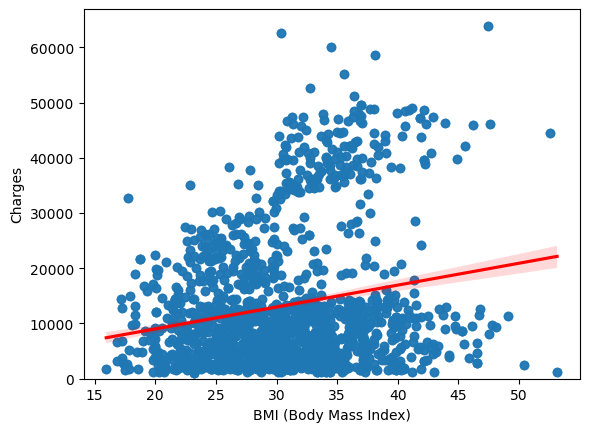

In [32]:
sns.regplot (x = 'BMI (Body Mass Index)', y = 'Charges', data = df, line_kws={"color": "red"})
plt.ylim(0,)


<details>
    <summary>Click here for Solution</summary>

```python
sns.regplot(x="bmi", y="charges", data=df, line_kws={"color": "red"})
plt.ylim(0,)
```
</details>


Implement the box plot for `charges` with respect to `smoker`.


<AxesSubplot:xlabel='Smoker', ylabel='Charges'>

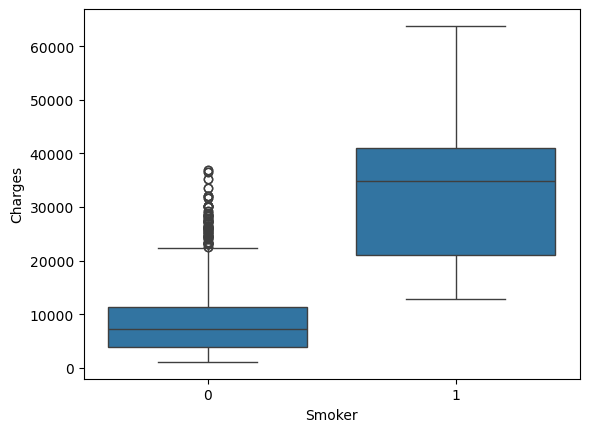

In [33]:
sns.boxplot(x="Smoker", y="Charges", data=df)

<details>
    <summary>Click here for Solution</summary>

```python
sns.boxplot(x="smoker", y="charges", data=df)
```
</details>


Print the correlation matrix for the dataset.


In [34]:
df.corr()

,Age,Sex,BMI (Body Mass Index),Children,Smoker,Region,Charges
Age,1.000000,-0.026584,0.112859,0.037126,-0.022290,-0.006969,0.298892
Sex,-0.026584,1.000000,0.042766,0.015693,0.083125,0.022360,0.062959
BMI (Body Mass Index),0.112859,0.042766,1.000000,-0.001642,0.011824,0.271200,0.199906
Children,0.037126,0.015693,-0.001642,1.000000,0.007016,-0.025594,0.066551
Smoker,-0.022290,0.083125,0.011824,0.007016,1.000000,0.053839,0.789141
Region,-0.006969,0.022360,0.271200,-0.025594,0.053839,1.000000,0.054018
Charges,0.298892,0.062959,0.199906,0.066551,0.789141,0.054018,1.000000


<details>
    <summary>Click here for Solution</summary>

```python
print(df.corr())
```
</details>


# Task 4 : Model Development

Fit a linear regression model that may be used to predict the `charges` value, just by using the `smoker` attribute of the dataset. Print the $ R^2 $ score of this model.


In [35]:
x = df[['Smoker']]
y = df['Charges']
lr = LinearRegression()
lr.fit(x,y)
lr.score(x,y)

0.6227430402464125

<details>
    <summary>Click here for Solution</summary>

```python
X = df[['smoker']]
Y = df['charges']
lm = LinearRegression()
lm.fit(X,Y)
print(lm.score(X, Y))
```
</details>


Fit a linear regression model that may be used to predict the `charges` value, just by using all other attributes of the dataset. Print the $ R^2 $ score of this model. You should see an improvement in the performance.


In [48]:
x1 = df[['Age',	'Sex',	'BMI (Body Mass Index)', 'Smoker', 'Children', 'Region']]
lr1 = LinearRegression()
lr1.fit(x1,y)
lr1.score(x1,y)

0.7505888664568174

<details>
    <summary>Click here for Solution</summary>

```python
# definition of Y and lm remain same as used in last cell. 
Z = df[["age", "gender", "bmi", "no_of_children", "smoker", "region"]]
lm.fit(Z,Y)
print(lm.score(Z, Y))
```
</details>


Create a training pipeline that uses `StandardScaler()`, `PolynomialFeatures()` and `LinearRegression()` to create a model that can predict the `charges` value using all the other attributes of the dataset. There should be even further improvement in the performance.


In [61]:
Input = [('scale', StandardScaler()),('polynomial', PolynomialFeatures()), ('model', LinearRegression())]
pipe = Pipeline(Input)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('model', LinearRegression())])

In [44]:
x1.info()                                                                 #Some of the columns are ints - Need to change to float. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    2771 non-null   int32  
 1   Sex                    2771 non-null   int64  
 2   BMI (Body Mass Index)  2771 non-null   float64
 3   Smoker                 2771 non-null   int32  
 4   Children               2771 non-null   int64  
 5   Region                 2771 non-null   int64  
dtypes: float64(1), int32(2), int64(3)
memory usage: 108.3 KB


In [58]:
x1 = x1.astype('float')
x1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 6 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    2771 non-null   float64
 1   Sex                    2771 non-null   float64
 2   BMI (Body Mass Index)  2771 non-null   float64
 3   Smoker                 2771 non-null   float64
 4   Children               2771 non-null   float64
 5   Region                 2771 non-null   float64
dtypes: float64(6)
memory usage: 130.0 KB


In [59]:
x1.shape

(2771, 6)

In [62]:
pipe.fit(x1, y)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures()),
                ('model', LinearRegression())])

In [63]:
ypipe = pipe.predict(x1)
print(r2_score(y,ypipe))

0.8453710909048233


<details>
    <summary>Click here for Solution</summary>

```python
# Y and Z use the same values as defined in previous cells 
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe=Pipeline(Input)
Z = Z.astype(float)
pipe.fit(Z,Y)
ypipe=pipe.predict(Z)
print(r2_score(Y,ypipe))
```
</details>


# Task 5 : Model Refinement

Split the data into training and testing subsets, assuming that 20% of the data will be reserved for testing.


In [67]:
x_train, x_test, y_train, y_test = train_test_split(x1,y, test_size= 0.2, random_state=1)

In [73]:
x_train.shape

(2216, 6)

In [74]:
x_test.shape

(555, 6)

<details>
    <summary>Click here for Solution</summary>

```python
# Z and Y hold same values as in previous cells
x_train, x_test, y_train, y_test = train_test_split(Z, Y, test_size=0.2, random_state=1)
```
</details>


Initialize a Ridge regressor that used hyperparameter $ \alpha = 0.1 $. Fit the model using training data data subset. Print the $ R^2 $ score for the testing data.


In [83]:
RidgeModel = Ridge(alpha = 0.1)
RidgeModel.fit(x_train,y_train)
y_hat_Ridge = RidgeModel.predict(x_test)

In [84]:
RidgeModel.score(x_test,y_test)

0.7254198858412217

In [85]:
R2_Ridge = r2_score(y_test,y_hat_Ridge)
R2_Ridge

0.7254198858412217

<details>
    <summary>Click here for Solution</summary>

```python
# x_train, x_test, y_train, y_test hold same values as in previous cells
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)
yhat = RidgeModel.predict(x_test)
print(r2_score(y_test,yhat))
```
</details>


Apply polynomial transformation to the training parameters with degree=2. Use this transformed feature set to fit the same regression model, as above, using the training subset. Print the $ R^2 $ score for the testing subset.


In [88]:
pr = PolynomialFeatures(degree =2)
x_train_pr = pr.fit_transform (x_train)
x_test_pr = pr.fit_transform (x_test)
RidgeModel.fit(x_train_pr, y_train)
RidgeModel.score(x_test_pr, y_test)

0.8208413195172275

In [89]:
#OR
y_hat_polyfitRR = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat_polyfitRR))

0.8208413195172275


<details>
    <summary>Click here for Solution</summary>

```python
# x_train, x_test, y_train, y_test hold same values as in previous cells
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))
```
</details>


# Congratulations! You have completed this project


## Authors


[Abhishek Gagneja](https://www.coursera.org/instructor/~129186572)

[Vicky Kuo](https://author.skills.network/instructors/vicky_kuo)


## Change Log


|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|
|2023-09-16|0.1|Abhishek Gagneja|Initial Version Created|
|2023-09-19|0.2|Vicky Kuo|Reviewed and Revised|


<h3> Copyright © 2023 IBM Corporation. All rights reserved. </h3>
